In [93]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import seaborn as sns
import os.path

In [94]:
panj = pd.read_pickle("./panj_outlier.pkl")  
dnevnik = pd.read_pickle('./dnevnik_cleaned.pkl')
vreme = pd.read_pickle('./vreme_cleaned.pkl')

In [95]:
panj.head()

,resId,siteNo,hiveNo,frameNo,hour,paramText,anMethText,resVal,resUnit,resUnit_desc,resValUncert,resValUncertSD,resQualValue,date,year,month
162858,CW207781,3,1,NaN,0,Colony weight,Automatic recording,24.6,G167A,Kilogram,NaN,NaN,NaN,2019-06-01 00:00:00,2019,6
162857,CW207782,3,1,NaN,1,Colony weight,Automatic recording,24.6,G167A,Kilogram,NaN,NaN,NaN,2019-06-01 01:00:00,2019,6
162855,CW207783,3,1,NaN,2,Colony weight,Automatic recording,24.5,G167A,Kilogram,NaN,NaN,NaN,2019-06-01 02:00:00,2019,6
162854,CW207784,3,1,NaN,3,Colony weight,Automatic recording,24.5,G167A,Kilogram,NaN,NaN,NaN,2019-06-01 03:00:00,2019,6
162853,CW207785,3,1,NaN,4,Colony weight,Automatic recording,24.5,G167A,Kilogram,NaN,NaN,NaN,2019-06-01 04:00:00,2019,6


In [96]:
panj['date'] = pd.to_datetime(panj['date'])
panj = panj.groupby(by=pd.Grouper(freq='D', key='date')).mean()
panj.drop(columns=['siteNo', 'hiveNo', "hour", "resValUncert", "year", "month","resValUncertSD", "resQualValue"], axis=1, inplace=True)
print(panj)

               resVal
date                 
2019-06-01  24.491304
2019-06-02  24.443478
2019-06-03  24.760870
2019-06-04  24.600000
2019-06-05  24.634783
2019-06-06  24.843478
2019-06-07  24.808696
2019-06-08  24.704348
2019-06-09  24.347826
2019-06-10  24.152174
2019-06-11  23.965217
2019-06-12  23.969565
2019-06-13  23.619048
2019-06-14  23.604762
2019-06-15  23.600000
2019-06-16  23.230435
2019-06-17  23.133333
2019-06-18  23.247826
2019-06-19  23.468182
2019-06-20  23.565217
2019-06-21  23.356522
2019-06-22  23.169565
2019-06-23  23.056522
2019-06-24  22.943478
2019-06-25  22.944444
2019-06-26        NaN
2019-06-27        NaN
2019-06-28  23.333333
2019-06-29  23.630435
2019-06-30  24.300000


C:\Users\borbr\AppData\Local\Temp\ipykernel_9080\1769213885.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  panj = panj.groupby(by=pd.Grouper(freq='D', key='date')).mean()


In [97]:
panj = panj.reset_index()
panj.columns = ["datum", "teza"]

In [98]:
panj.head()

,datum,teza
0,2019-06-01,24.491304
1,2019-06-02,24.443478
2,2019-06-03,24.760870
3,2019-06-04,24.600000
4,2019-06-05,24.634783


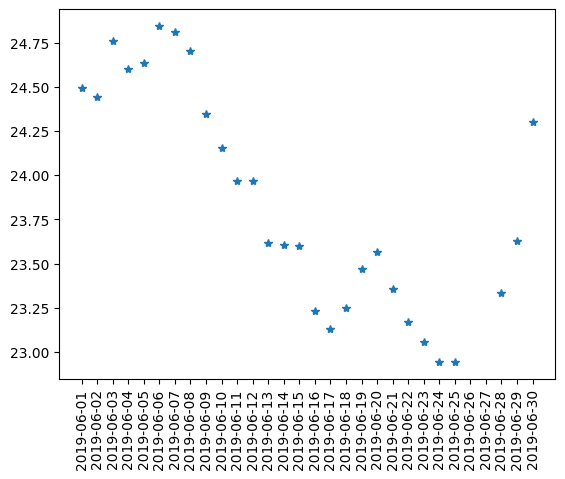

In [102]:
plt.plot(panj['datum'], panj['teza'], '*')
plt.xticks(panj['datum'][::1],  rotation='vertical')
plt.show()